# This notebook is to evaluate different wgcna modules

In [1]:
import os
import sys
sys.path.append("../..")
import pandas as pd
from sys import platform 
from src.eda.eda_functions import *
from src.eda.subset_network import subset_network
from src.eda.process_phenotype import *
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# this is the one published in the Kapoor paper
wgcna_modules = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/' + 'kapoor_wgcna_modules.csv')

In [3]:
le = LabelEncoder()
wgcna_modules['encoded_cluster'] = le.fit_transform(wgcna_modules['cluster'])

In [8]:
# These module dfs are the ones using different height cutoff for merging (not the same merging used in the Kapoor paper)
module_dfs = []
module_names = []
for file in os.listdir(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/'):
    if 'height' in file:
        module_df = pd.read_csv(os.path.join(prefix, '/Shared drives/NIAAA_ASSIST/Data/eda_derived', file), index_col = 0)
        module_df['encoded_cluster'] = le.fit_transform(module_df['wgcna_cluster'])
        module_dfs.append(module_df)
        module_names.append(file[:-4])

## Evaluation 1.1: how do # genes change in each community when community assingment changes?

Removing existing folder: output
Created folder output


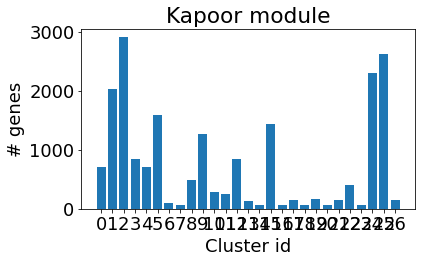

In [4]:
plot_gene_cnt_each_cluster([wgcna_modules], 'encoded_cluster', ['Kapoor module'])

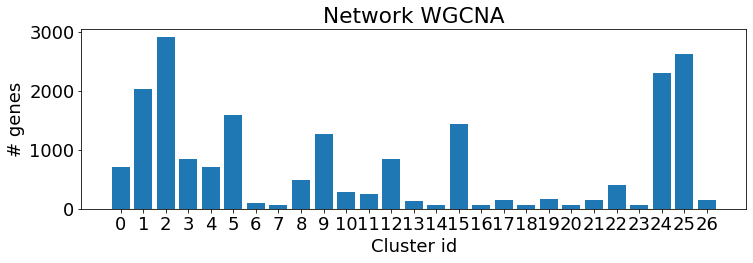

In [9]:
plot_gene_cnt_each_cluster_v2(wgcna_modules, 'encoded_cluster', 'Network WGCNA', '_network')

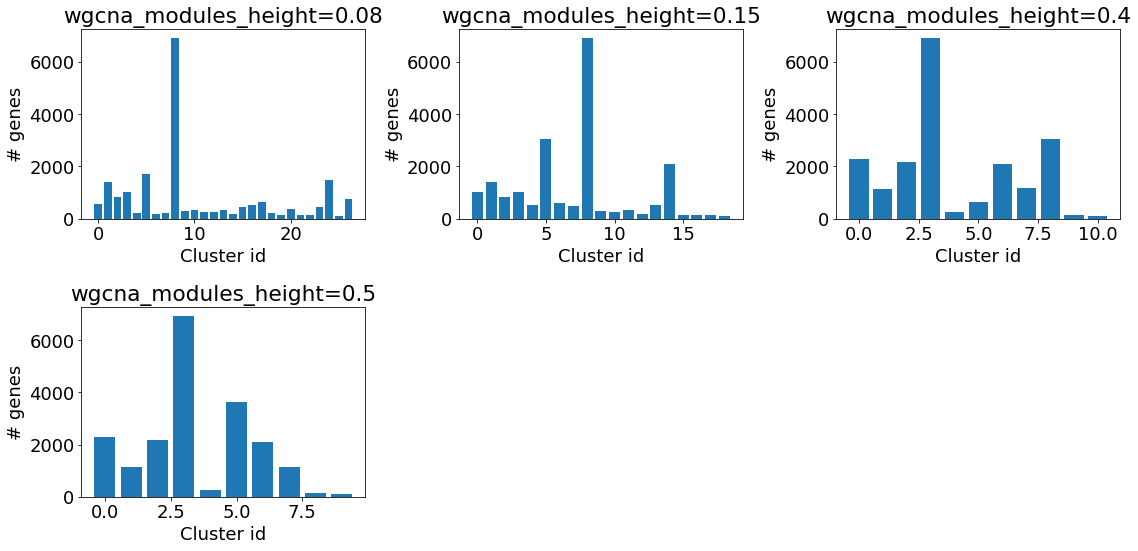

In [9]:
plot_gene_cnt_each_cluster(module_dfs, 'encoded_cluster', module_names)

In [10]:
expression_meta = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/expression_meta_Apr6.csv', low_memory = False)

In [11]:
deseq = pd.read_excel(prefix + '/Shared drives/NIAAA_ASSIST/Data/deseq.alc.vs.control.age.rin.batch.gender.PMI.corrected.w.prot.coding.gene.name.xlsx')
deseq['abs_log2FC'] = abs(deseq['log2FoldChange'])

# % DEG in each cluster

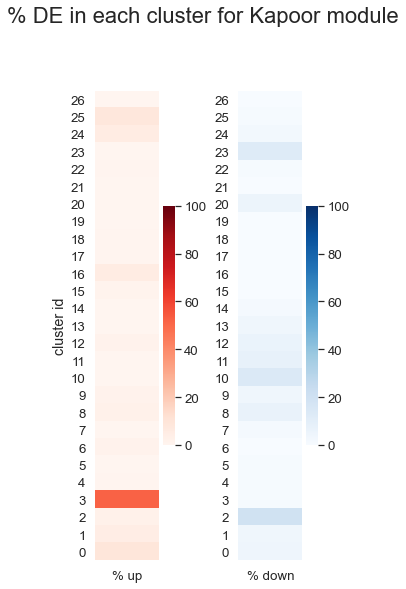

In [20]:
cluster_DE_perc(wgcna_modules, 'encoded_cluster', 'Kapoor module', deseq)

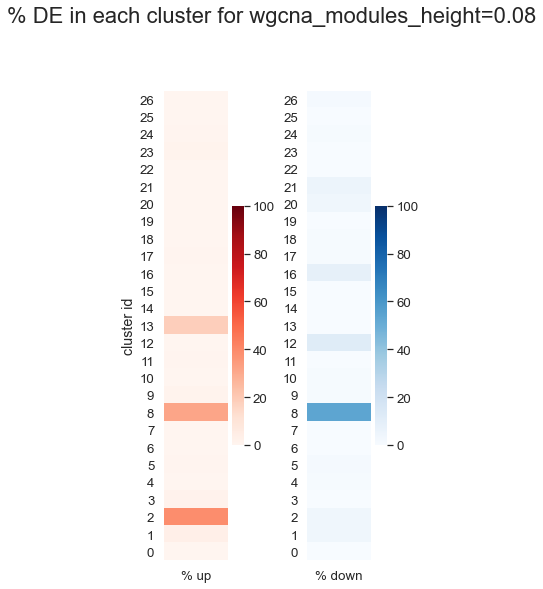

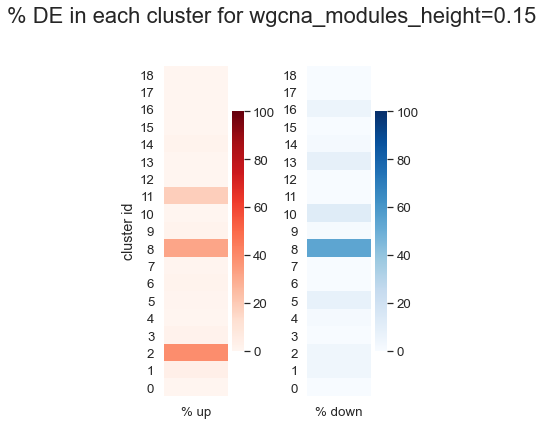

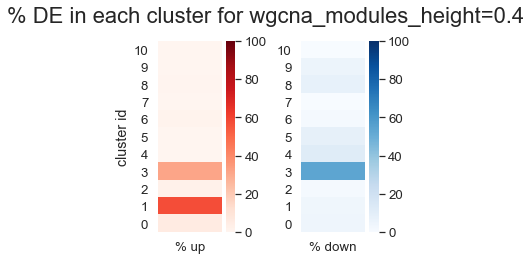

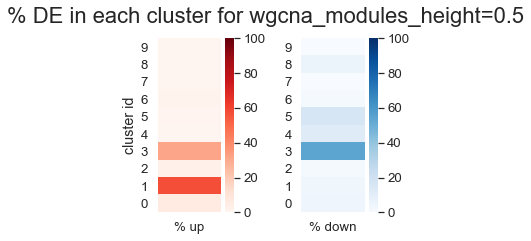

In [21]:
for i, cluster_df in enumerate(module_dfs):
    cluster_DE_perc(cluster_df, 'encoded_cluster', module_names[i], deseq)

## Evaluation 1.4: how do % of significant genes change when community assingment changes (This process takes >10 min to run)

### Docker Module DE/ Diagnostic Correlation

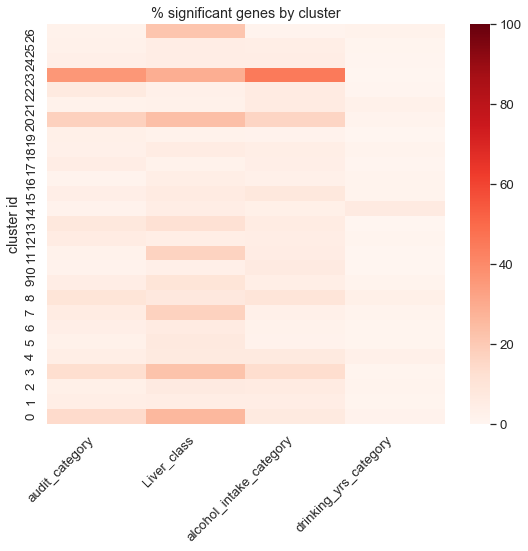

In [29]:
plot_sig_perc(wgcna_modules, 'encoded_cluster', 'Kapoor module', expression_meta)

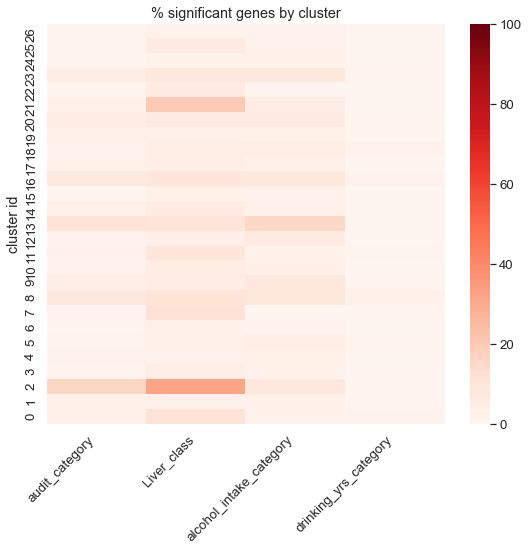

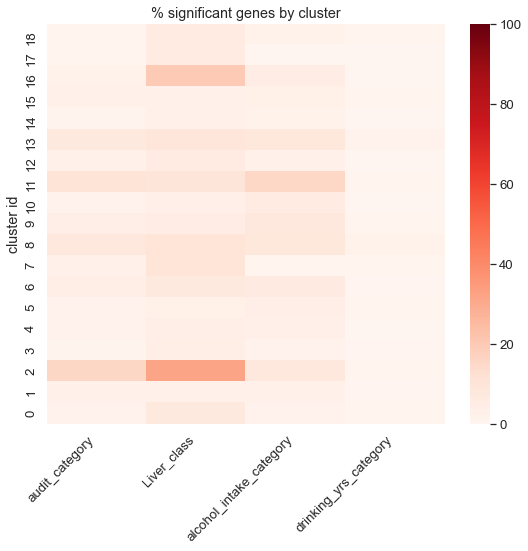

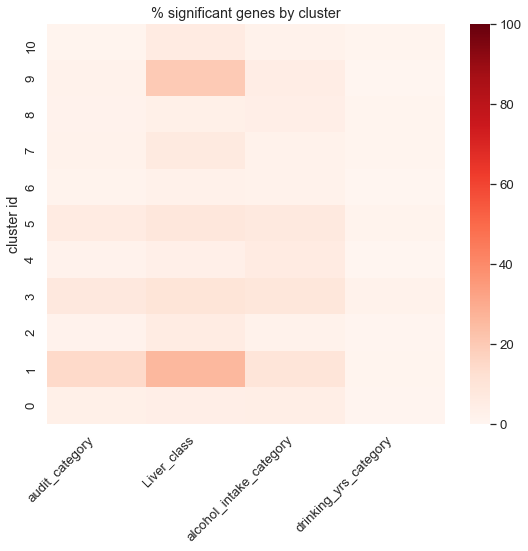

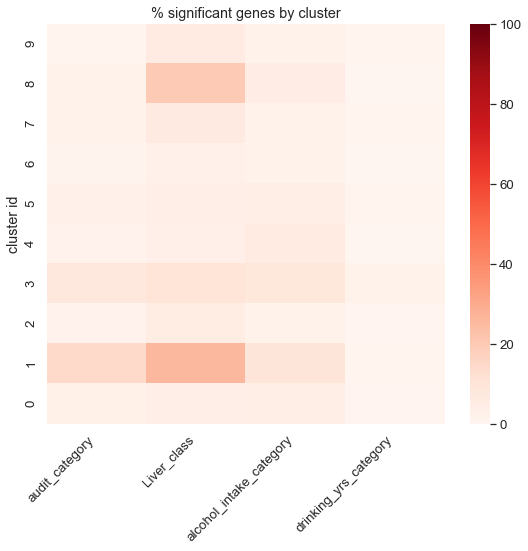

Wall time: 28min 32s


In [30]:
%%time
for i, cluster_df in enumerate(module_dfs):
    plot_sig_perc(cluster_df, 'encoded_cluster', module_names[i], expression_meta)

## Evaluation 1.5: how do trait and community correlation change when community assignment change

### Docker Module DE/ Diagnostic Correlation

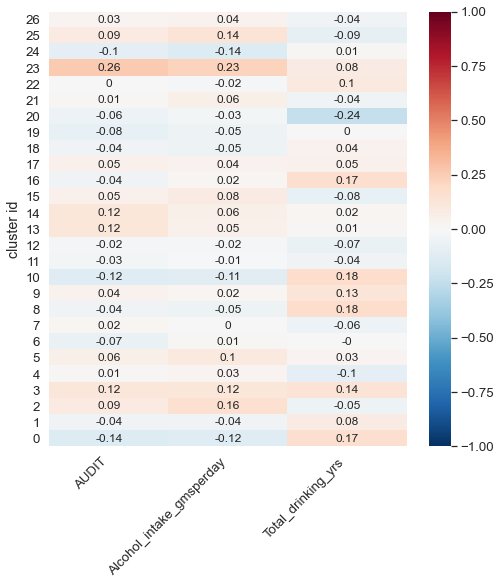

In [27]:
cluster_phenotype_corr(wgcna_modules, 'encoded_cluster', 'Kapoor module', expression_meta)

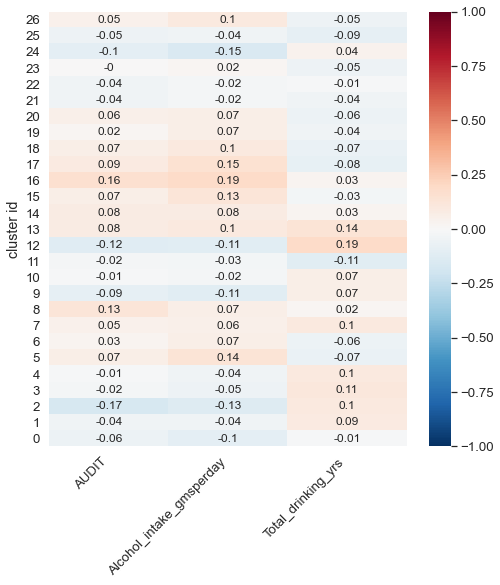

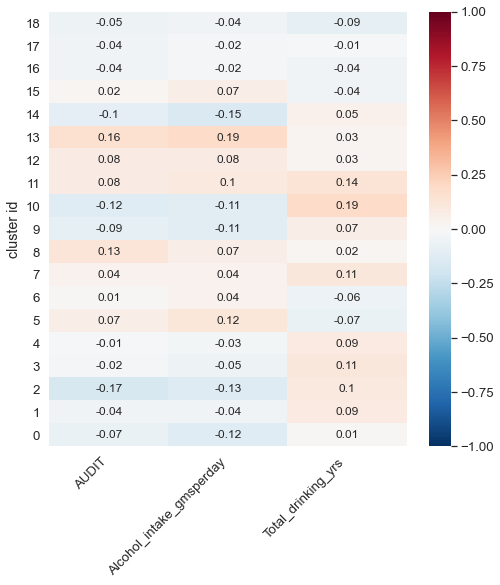

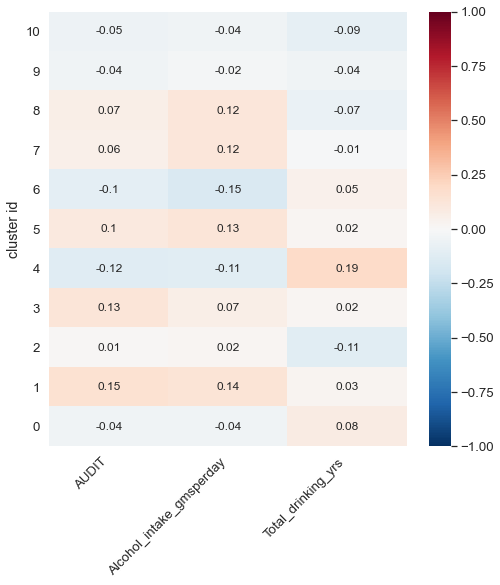

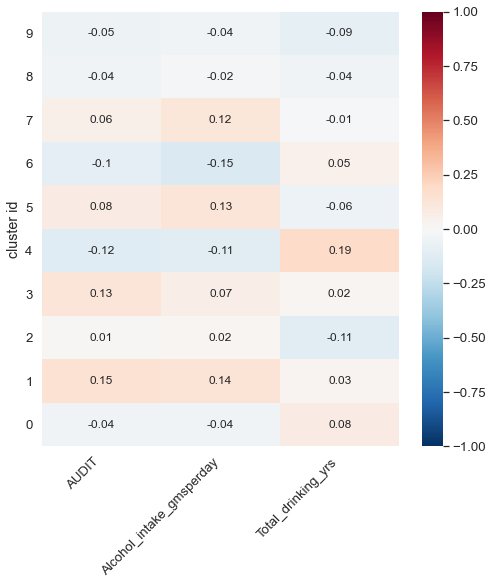

Wall time: 19.2 s


In [28]:
%%time
for i, cluster_df in enumerate(module_dfs):
    cluster_phenotype_corr(cluster_df, 'encoded_cluster', module_names[i], expression_meta)